In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./dataset/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
y = df.price
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [4]:
x = df.drop(['date', 'price', 'id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x_train.shape, y_train.shape

((17290, 13), (17290,))

In [8]:
x_test.shape, y_test.shape

((4323, 13), (4323,))

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [10]:
model = linear_model.LinearRegression()

In [11]:
scores = cross_val_score(model, x_train, y_train, scoring='r2', cv=5)
scores

array([0.63678563, 0.64948775, 0.66327871, 0.64824439, 0.6503337 ])

In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test)

In [14]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [-3.85092466e+04  4.33860809e+04  1.15562896e+02 -3.09879154e-01
  1.90355109e+04  5.93942640e+05  4.21882106e+04  1.87983011e+04
  1.23589329e+05  5.72871355e+01  5.82757606e+01 -3.48504317e+03
  8.43247283e+00]
Intercept: 6038759.121409508
Mean squared error (MSE): 51099250311.21
Coefficient of determination (R^2): 0.65


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
np.array(y_test)

array([719000., 335000., 310000., ..., 510000., 650000., 510000.])

In [17]:
y_pred

array([706497.13908896, 347158.5897244 , 420589.08615898, ...,
       529267.17244956, 478349.84268638, 514239.6957295 ])

<AxesSubplot: xlabel='price', ylabel='pred_price'>

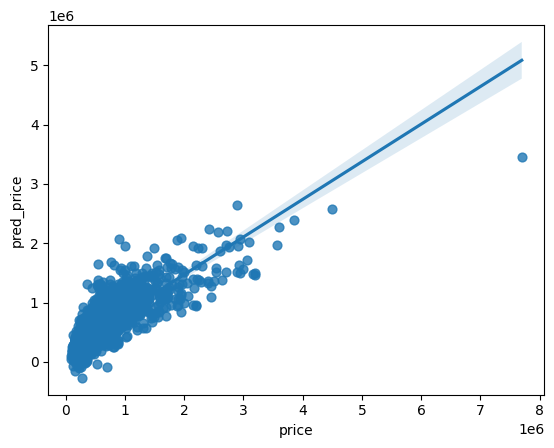

In [18]:
pred_price = pd.Series(y_pred, name="pred_price").reset_index()
price = pd.Series(y_test, name="price").reset_index()
data = pd.concat([price, pred_price], axis=1)
df_plt = data.drop(['index'], axis=1)
sns.regplot(df_plt, x='price', y='pred_price', scatter_kws={"s": 40})

In [19]:
# plt.scatter(y_test, y_pred, alpha=0.4)
# plt.show()